In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 509.1 kB/s eta 0:00:00a 0:00:01
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 4.4 MB/s eta 0:00:0000:0100:01
Using cached pandas-2.

Epoch 1/50, Total Error: 0


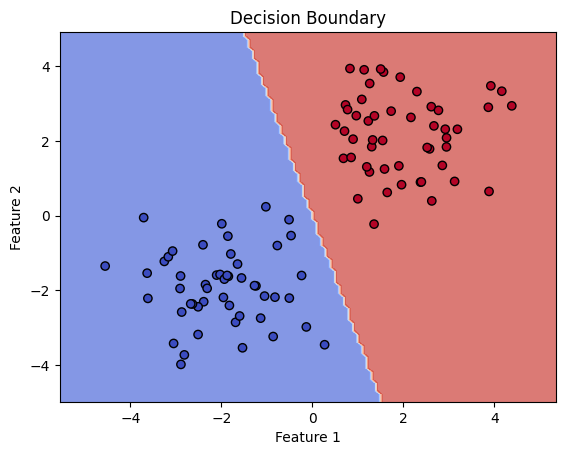

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(0)
class_0 = np.random.randn(50, 2) + [-2, -2]  # Class 0
class_1 = np.random.randn(50, 2) + [2, 2]    # Class 1

X = np.vstack([class_0, class_1])  # Features
y = np.array([0] * 50 + [1] * 50)  # Labels

# Step 2: Define the perceptron class
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1):
        self.weights = np.random.rand(input_dim)  # Initialize weights randomly
        self.bias = 0.0                           # Initialize bias
        self.lr = learning_rate                   # Learning rate

    def predict(self, x):
        """Predict output using the step function."""
        linear_output = np.dot(x, self.weights) + self.bias
        return 1 if linear_output > 0 else 0

    def train(self, X, y, epochs):
        """Train the perceptron using the perceptron learning rule."""
        for epoch in range(epochs):
            total_error = 0
            for i in range(len(X)):
                # Predict output
                y_pred = self.predict(X[i])
                # Update weights and bias if there's an error
                error = y[i] - y_pred
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error
                total_error += abs(error)
            # Print epoch details
            print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error}")
            # Stop early if no errors
            if total_error == 0:
                break

# Step 3: Initialize and train the perceptron
perceptron = Perceptron(input_dim=2, learning_rate=0.1)
perceptron.train(X, y, epochs=50)

# Step 4: Plot decision boundary
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([perceptron.predict(point) for point in grid])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(perceptron, X, y)
